# Analýza substituční šifry a knihovny SubCipher (MIPY - Team 002)

Tento notebook poskytuje interaktivní průvodce knihovnou SubCipher, která implementuje substituční šifru a algoritmy pro její prolomení. Zaměříme se především na Metropolis-Hastings algoritmus, který je použit pro dešifrování textu bez znalosti klíče.

## Obsah
1. [Úvod do substituční šifry](#1-úvod-do-substituční-šifry)
2. [Knihovna SubCipher](#2-knihovna-subcipher)
3. [Šifrování a dešifrování](#3-šifrování-a-dešifrování)
4. [Analýza textu a bigramová matice](#4-analýza-textu-a-bigramová-matice)
5. [Metropolis-Hastings algoritmus](#5-metropolis-hastings-algoritmus)
6. [Interaktivní demonstrace](#6-interaktivní-demonstrace)
7. [Analýza úspěšnosti](#7-analýza-úspěšnosti)
8. [Limitace a možná vylepšení](#8-limitace-a-možná-vylepšení)
9. [Závěr](#9-závěr)


## 1. Úvod do substituční šifry

Substituční šifra je jedna z nejstarších a nejjednodušších šifrovacích metod. Princip je jednoduchý: každý znak v původním textu (otevřeném textu) je nahrazen jiným znakem podle předem definovaného klíče.

### Princip substituční šifry

Mějme abecedu $A = \{a_1, a_2, \ldots, a_n\}$ a permutaci této abecedy $K = \{k_1, k_2, \ldots, k_n\}$, kterou nazýváme klíčem. Šifrování probíhá tak, že každý znak $a_i$ v otevřeném textu nahradíme znakem $k_i$ z klíče.

Například pro anglickou abecedu a klíč:
- Abeceda: `ABCDEFGHIJKLMNOPQRSTUVWXYZ`
- Klíč: `XYZABCDEFGHIJKLMNOPQRSTUVW`

Slovo "HELLO" by bylo zašifrováno jako "EBIIL".

### Historie a význam

Substituční šifry byly používány již ve starověku. Nejznámější je Caesarova šifra, kde je každé písmeno posunuto o pevný počet pozic v abecedě. Obecnější formou je monoalfabetická substituční šifra, kde je každé písmeno nahrazeno jiným podle libovolné permutace abecedy.

Ačkoli jsou tyto šifry z dnešního pohledu považovány za slabé, jejich studium je důležité pro pochopení základních principů kryptografie a kryptoanalýzy.


## 2. Knihovna SubCipher

Knihovna SubCipher je implementací substituční šifry v Pythonu. Poskytuje nástroje pro:
- Šifrování a dešifrování textu pomocí substituční šifry
- Analýzu textu a vytváření statistických modelů
- Automatické prolomení šifry pomocí Metropolis-Hastings algoritmu

### Struktura knihovny

Knihovna se skládá z několika modulů:
- `cipher.py`: Implementace šifrování a dešifrování
- `analysis.py`: Nástroje pro analýzu textu a výpočet pravděpodobností
- `mh_solver.py`: Implementace Metropolis-Hastings algoritmu pro prolomení šifry
- `utils.py`: Pomocné funkce pro práci s textem
- `constants.py`: Konstanty používané v knihovně

### Abeceda a normalizace textu

Knihovna pracuje s 27-znakovou abecedou, která obsahuje všechna velká písmena anglické abecedy a podtržítko jako náhradu za mezeru:


In [86]:
from subcipher.constants import ALPHABET
print(f"Abeceda: {ALPHABET}")
print(f"Délka abecedy: {len(ALPHABET)}")


Abeceda: ABCDEFGHIJKLMNOPQRSTUVWXYZ_
Délka abecedy: 27


Pro práci s textem je důležité jej normalizovat - převést na velká písmena, odstranit diakritiku a nahradit všechny nealfabetické znaky podtržítkem:


In [87]:
from subcipher.utils import normalize_text

text = "Příliš žluťoučký kůň úpěl ďábelské ódy."
normalized = normalize_text(text)
print(f"Původní text: {text}")
print(f"Normalizovaný text: {normalized}")


Původní text: Příliš žluťoučký kůň úpěl ďábelské ódy.
Normalizovaný text: PRILIS_ZLUTOUCKY_KUN_UPEL_DABELSKE_ODY_


## 3. Šifrování a dešifrování

Nyní si ukážeme, jak funguje šifrování a dešifrování pomocí knihovny SubCipher. Nejprve importujeme potřebné funkce:


In [88]:
from subcipher.cipher import substitute_encrypt, substitute_decrypt

### Generování náhodného klíče

Pro šifrování potřebujeme klíč, který je permutací abecedy. Můžeme jej vygenerovat náhodně:


In [89]:
def generate_random_key():
    """Vygeneruje náhodný klíč jako permutaci abecedy."""
    key = list(ALPHABET)
    random.shuffle(key)
    return ''.join(key)

random_key = generate_random_key()
print(f"Náhodný klíč: {random_key}")


Náhodný klíč: NEVCXQSUOTZHMJKAYLD_FWPIRBG


### Šifrování textu

Nyní můžeme zašifrovat text pomocí vygenerovaného klíče:


In [90]:
plaintext = "DOBRY_DEN_JAK_SE_MATE_DNES_JE_KRASNY_DEN"
ciphertext = substitute_encrypt(plaintext, random_key)

print(f"Původní text: {plaintext}")
print(f"Zašifrovaný text: {ciphertext}")


Původní text: DOBRY_DEN_JAK_SE_MATE_DNES_JE_KRASNY_DEN
Zašifrovaný text: CKELRGCXJGTNZGDXGMN_XGCJXDGTXGZLNDJRGCXJ


### Dešifrování textu

Pokud známe klíč, můžeme text jednoduše dešifrovat:


In [91]:
decrypted = substitute_decrypt(ciphertext, random_key)
print(f"Dešifrovaný text: {decrypted}")
print(f"Úspěšnost dešifrování: {'ÚSPĚCH' if decrypted == plaintext else 'NEÚSPĚCH'}")


Dešifrovaný text: DOBRY_DEN_JAK_SE_MATE_DNES_JE_KRASNY_DEN
Úspěšnost dešifrování: ÚSPĚCH


### Vizualizace mapování znaků

Pro lepší pochopení, jak substituční šifra funguje, můžeme vizualizovat mapování mezi původní abecedou a klíčem:


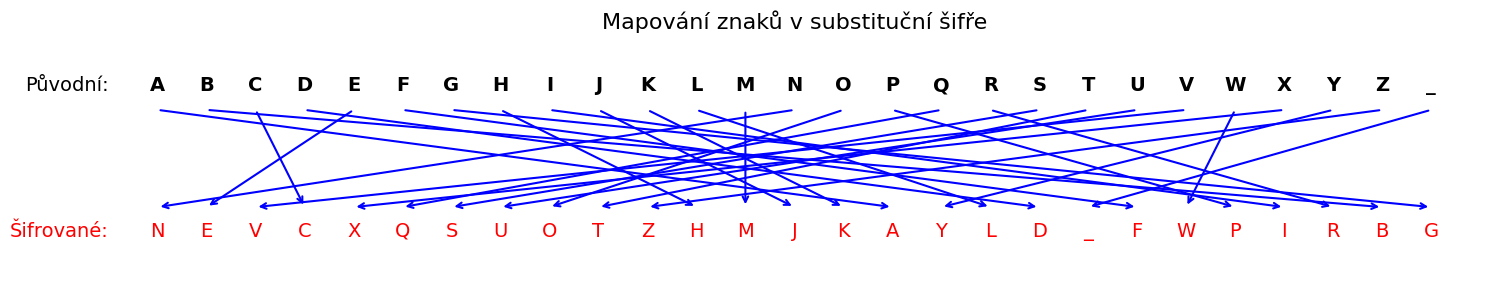

In [92]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_key_mapping(key):
    """Vizualizuje mapování mezi abecedou a klíčem."""
    fig, ax = plt.subplots(figsize=(15, 3))

    # Vytvoření mapování
    mapping = {a: k for a, k in zip(ALPHABET, key)}

    # Vykreslení šipek
    for i, (a, k) in enumerate(mapping.items()):
        ax.annotate("", xy=(i, 0.3), xytext=(ALPHABET.index(k), 0.7),
                   arrowprops=dict(arrowstyle="->", color="blue", lw=1.5))

    # Vykreslení znaků abecedy
    for i, a in enumerate(ALPHABET):
        ax.text(i, 0.8, a, ha="center", va="center", fontsize=14, fontweight="bold")
        ax.text(i, 0.2, mapping[a], ha="center", va="center", fontsize=14, color="red")

    ax.set_xlim(-1, len(ALPHABET))
    ax.set_ylim(0, 1)
    ax.set_title("Mapování znaků v substituční šifře", fontsize=16)
    ax.text(-1, 0.8, "Původní:", ha="right", va="center", fontsize=14)
    ax.text(-1, 0.2, "Šifrované:", ha="right", va="center", fontsize=14, color="red")
    ax.axis("off")

    plt.tight_layout()
    plt.show()

visualize_key_mapping(random_key)


## 4. Analýza textu a bigramová matice

Pro prolomení substituční šifry bez znalosti klíče potřebujeme analyzovat statistické vlastnosti textu. Jedním z nejužitečnějších nástrojů je bigramová matice, která zachycuje četnost výskytu dvojic znaků (bigramů) v textu.

### Načtení a příprava referenčního textu


In [93]:
from subcipher.utils import load_textfile
from subcipher.analysis import get_bigrams, transition_matrix

# Načtení referenčního textu
ref_text = load_textfile("../data_samples/krakatit.txt")
normalized_ref = normalize_text(ref_text)

print(f"Délka referenčního textu: {len(normalized_ref)} znaků")
print(f"Ukázka normalizovaného textu: {normalized_ref[:100]}...")


Délka referenčního textu: 439869 znaků
Ukázka normalizovaného textu: KAREL_CAPEK_ZNENI_TOHOTO_TEXTU_VYCHAZI_Z_DILA_KRAKATIT_TAK_JAK_BYLO_VYDANO_V_CESKOSLOVENSKEM_SPISOVA...


### Vytvoření bigramové matice

Nyní vytvoříme bigramovou matici, která zachycuje pravděpodobnost přechodu z jednoho znaku na druhý:


In [94]:
# Získání bigramů z textu
bigrams = get_bigrams(normalized_ref)
print(f"Počet bigramů: {len(bigrams)}")
print(f"Ukázka bigramů: {bigrams[:10]}...")

# Vytvoření přechodové matice
bigram_matrix = transition_matrix(bigrams, ALPHABET)
print(f"Tvar matice: {bigram_matrix.shape}")


Počet bigramů: 439868
Ukázka bigramů: ['KA', 'AR', 'RE', 'EL', 'L_', '_C', 'CA', 'AP', 'PE', 'EK']...
Tvar matice: (27, 27)


### Vizualizace bigramové matice

Pro lepší pochopení statistických vlastností textu vizualizujeme bigramovou matici:


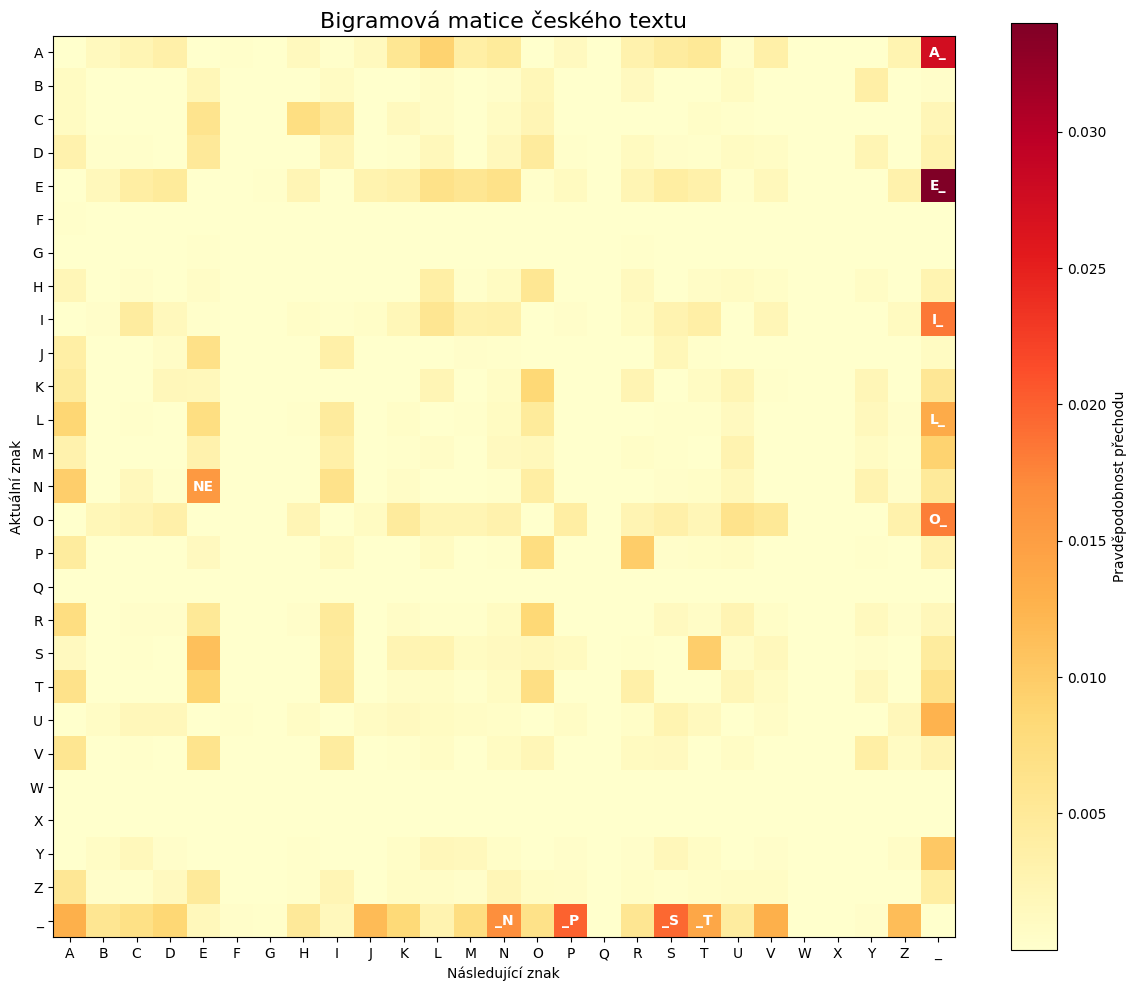

In [95]:
plt.figure(figsize=(12, 10))
plt.imshow(bigram_matrix, cmap='YlOrRd')
plt.colorbar(label='Pravděpodobnost přechodu')
plt.title('Bigramová matice českého textu', fontsize=16)
plt.xlabel('Následující znak')
plt.ylabel('Aktuální znak')
plt.xticks(range(len(ALPHABET)), list(ALPHABET))
plt.yticks(range(len(ALPHABET)), list(ALPHABET))

# Zvýraznění nejčastějších bigramů
top_bigrams = []
for i in range(len(ALPHABET)):
    for j in range(len(ALPHABET)):
        if bigram_matrix[i, j] > 0.005:  # Práh pro zvýraznění
            top_bigrams.append((i, j, bigram_matrix[i, j]))

top_bigrams.sort(key=lambda x: x[2], reverse=True)
for i, j, prob in top_bigrams[:10]:  # Zobrazení 10 nejčastějších bigramů
    plt.annotate(f"{ALPHABET[i]}{ALPHABET[j]}", xy=(j, i), ha="center", va="center",
                 color="white" if prob > 0.01 else "black", fontweight="bold")

plt.tight_layout()
plt.show()


### Analýza nejčastějších bigramů

Podívejme se na nejčastější bigramy v českém textu:


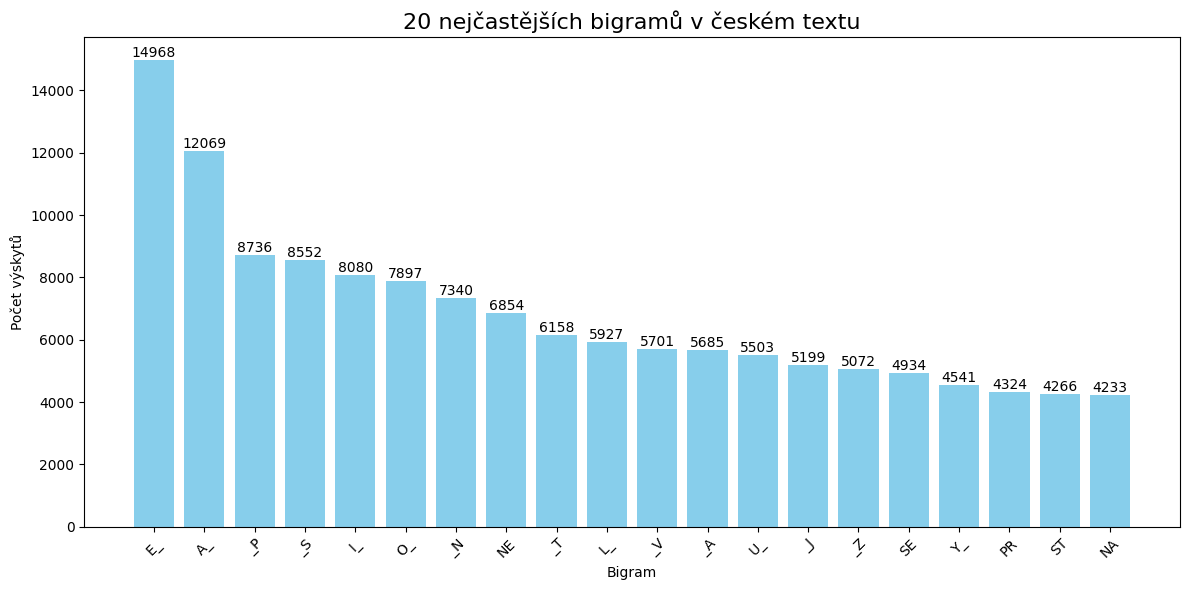

In [96]:
# Seřazení bigramů podle četnosti
bigram_counts = {}
for bg in bigrams:
    if len(bg) == 2:
        bigram_counts[bg] = bigram_counts.get(bg, 0) + 1

sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Vizualizace nejčastějších bigramů
top_n = 20
top_bigrams = sorted_bigrams[:top_n]
bg_labels = [bg for bg, _ in top_bigrams]
bg_counts = [count for _, count in top_bigrams]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(top_n), bg_counts, color='skyblue')
plt.xticks(range(top_n), bg_labels, rotation=45)
plt.title(f'{top_n} nejčastějších bigramů v českém textu', fontsize=16)
plt.xlabel('Bigram')
plt.ylabel('Počet výskytů')

# Přidání hodnot nad sloupce
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 5. Metropolis-Hastings algoritmus

Nyní se dostáváme k jádru naší analýzy - Metropolis-Hastings algoritmu, který je použit pro prolomení substituční šifry bez znalosti klíče.

### Teoretický základ

Metropolis-Hastings algoritmus je metoda Markov Chain Monte Carlo (MCMC), která umožňuje vzorkování z pravděpodobnostních distribucí. V kontextu kryptoanalýzy jej používáme k prohledávání prostoru možných klíčů a nalezení toho, který s největší pravděpodobností dešifruje text správně.

Algoritmus funguje na principu náhodné procházky prostorem klíčů, kde každý krok je přijat nebo odmítnut na základě pravděpodobnosti, která závisí na kvalitě dešifrovaného textu. Kvalita je měřena pomocí funkce věrohodnosti (plausibility), která porovnává statistické vlastnosti dešifrovaného textu s referenčním textem.

### Implementace v knihovně SubCipher

Podívejme se na implementaci Metropolis-Hastings algoritmu v knihovně SubCipher:


In [97]:
from subcipher.mh_solver import metropolis_hastings
from subcipher.analysis import calculate_plausibility

# Vysvětlení hlavních kroků algoritmu
def explain_metropolis_hastings():
    print("Metropolis-Hastings algoritmus pro prolomení substituční šifry:")
    print("1. Začínáme s náhodným klíčem (permutací abecedy)")
    print("2. V každé iteraci:")
    print("   a. Vytvoříme nový klíč záměnou dvou náhodných znaků v aktuálním klíči")
    print("   b. Dešifrujeme text pomocí nového klíče")
    print("   c. Vypočítáme skóre věrohodnosti dešifrovaného textu")
    print("   d. Rozhodneme, zda přijmout nový klíč na základě:")
    print("      - Pokud je nové skóre lepší než aktuální, přijmeme nový klíč")
    print("      - Pokud je horší, přijmeme jej s pravděpodobností exp((nové_skóre - aktuální_skóre) / teplota)")
    print("3. Teplota se postupně snižuje (simulované žíhání), což vede k menší pravděpodobnosti přijetí horších řešení")
    print("4. Algoritmus vrátí nejlepší nalezený klíč a jeho skóre")

explain_metropolis_hastings()


Metropolis-Hastings algoritmus pro prolomení substituční šifry:
1. Začínáme s náhodným klíčem (permutací abecedy)
2. V každé iteraci:
   a. Vytvoříme nový klíč záměnou dvou náhodných znaků v aktuálním klíči
   b. Dešifrujeme text pomocí nového klíče
   c. Vypočítáme skóre věrohodnosti dešifrovaného textu
   d. Rozhodneme, zda přijmout nový klíč na základě:
      - Pokud je nové skóre lepší než aktuální, přijmeme nový klíč
      - Pokud je horší, přijmeme jej s pravděpodobností exp((nové_skóre - aktuální_skóre) / teplota)
3. Teplota se postupně snižuje (simulované žíhání), což vede k menší pravděpodobnosti přijetí horších řešení
4. Algoritmus vrátí nejlepší nalezený klíč a jeho skóre


### Vizualizace průběhu algoritmu

Pro lepší pochopení fungování algoritmu implementujeme vlastní verzi s vizualizací průběhu:


In [98]:
import math
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

def metropolis_hastings_visualized(ciphertext, tm_ref, iterations=1000, initial_temp=1.0, visualize_every=50):
    """Implementace Metropolis-Hastings algoritmu s vizualizací průběhu."""
    # Inicializace
    current_key = list(ALPHABET)
    random.shuffle(current_key)
    current_key = ''.join(current_key)

    current_text = substitute_decrypt(ciphertext, current_key)
    current_score = calculate_plausibility(current_text, tm_ref)

    best_key = current_key
    best_score = current_score

    # Pro vizualizaci
    scores = [current_score]
    best_scores = [best_score]
    temperatures = [initial_temp]
    acceptance_rates = []
    accepted = 0

    min_temp = 1e-10  # Minimální teplota

    # Vytvoření grafu
    plt.figure(figsize=(15, 10))

    for iterator in range(iterations):
        temperature = max(initial_temp * (1 - iterator / iterations), min_temp)
        temperatures.append(temperature)

        # Vytvoření nového klíče záměnou dvou náhodných znaků
        new_key = list(current_key)
        idx1, idx2 = random.sample(range(len(ALPHABET)), 2)
        new_key[idx1], new_key[idx2] = new_key[idx2], new_key[idx1]
        new_key = ''.join(new_key)

        # Dešifrování a výpočet skóre
        new_text = substitute_decrypt(ciphertext, new_key)
        new_score = calculate_plausibility(new_text, tm_ref)

        # Rozhodnutí o přijetí nového klíče
        score_diff = 0.0
        try:
            score_diff = new_score - current_score
            acceptance_probability = math.exp(min(score_diff / temperature, 700))
        except (OverflowError, ZeroDivisionError):
            acceptance_probability = 1.0 if score_diff > 0 else 0.0

        # Přijetí nebo odmítnutí nového klíče
        if new_score > current_score or random.random() < acceptance_probability:
            current_key = new_key
            current_score = new_score
            accepted += 1

            if current_score > best_score:
                best_key = current_key
                best_score = current_score

        scores.append(current_score)
        best_scores.append(best_score)
        acceptance_rates.append(accepted / (iterator + 1))

        # Vizualizace průběhu
        if (iterator + 1) % visualize_every == 0 or iterator == iterations - 1:
            clear_output(wait=True)

            plt.figure(figsize=(15, 10))

            # Graf skóre
            plt.subplot(2, 2, 1)
            plt.plot(scores, label='Aktuální skóre', alpha=0.5)
            plt.plot(best_scores, label='Nejlepší skóre', color='red')
            plt.title('Průběh skóre')
            plt.xlabel('Iterace')
            plt.ylabel('Skóre věrohodnosti')
            plt.legend()
            plt.grid(True)

            # Graf teploty
            plt.subplot(2, 2, 2)
            plt.plot(temperatures, label='Teplota')
            plt.title('Průběh teploty (simulované žíhání)')
            plt.xlabel('Iterace')
            plt.ylabel('Teplota')
            plt.yscale('log')
            plt.grid(True)

            # Graf míry přijetí
            plt.subplot(2, 2, 3)
            plt.plot(acceptance_rates, label='Míra přijetí')
            plt.title('Míra přijetí nových klíčů')
            plt.xlabel('Iterace')
            plt.ylabel('Míra přijetí')
            plt.grid(True)

            # Ukázka dešifrovaného textu
            plt.subplot(2, 2, 4)
            plt.axis('off')
            current_decrypted = substitute_decrypt(ciphertext, current_key)
            best_decrypted = substitute_decrypt(ciphertext, best_key)

            info_text = f"Iterace: {iterator + 1}/{iterations}\n"
            info_text += f"Aktuální skóre: {current_score:.4f}\n"
            info_text += f"Nejlepší skóre: {best_score:.4f}\n"
            info_text += f"Teplota: {temperature:.6f}\n"
            info_text += f"Míra přijetí: {accepted/(iterator + 1):.2f}\n\n"
            info_text += f"Aktuální dešifrovaný text:\n{current_decrypted[:100]}...\n\n"
            info_text += f"Nejlepší dešifrovaný text:\n{best_decrypted[:100]}..."

            plt.text(0, 1, info_text, fontsize=10, verticalalignment='top')

            plt.tight_layout()
            plt.show()

            # Informace v textové podobě
            # print(f"Iterace {iterator + 1}/{iterations} | Skóre: {current_score:.4f} | Nejlepší: {best_score:.4f} | Teplota: {temperature:.6f}")

    return best_key, best_score, scores, best_scores, temperatures, acceptance_rates


## 6. Interaktivní demonstrace

Nyní si vyzkoušíme Metropolis-Hastings algoritmus na reálném příkladu. Nejprve zašifrujeme krátký text a poté se jej pokusíme dešifrovat bez znalosti klíče.


In [99]:
# Příprava textu pro šifrování
sample_text = normalized_ref[:500]  # Použijeme prvních 500 znaků z referenčního textu
print(f"Původní text (500 znaků):\n{sample_text}")


Původní text (500 znaků):
KAREL_CAPEK_ZNENI_TOHOTO_TEXTU_VYCHAZI_Z_DILA_KRAKATIT_TAK_JAK_BYLO_VYDANO_V_CESKOSLOVENSKEM_SPISOVATELI_V_ROCE_CAPEK_KARE_L_TOVARNA_NA_ABSOLUTNO_KRAKATIT_VYD_TOVARNY_NA_ABSOLUTNO_VYD_KRAKATITU_PRAHA_CESKOSLOVENSKY_SPISOVATEL_S_SPISY_SV_DALSI_DILA_KARLA_CAPKA_NALEZNETE_ONLINE_NA_WWW_STRA_NKACH_MESTSKE_KNIHOVNY_V_PRAZE_WWW_MLP_CZ_KARELCAPEK_ELEKTRONICKE_PUBLIKOVANI_DILA_KARLA_CAPKA_JE_SPOLECN_YM_PROJEKTEM_MESTSKE_KNIHOVNY_V_PRAZE_SPOLECNOSTI_BRATRI_CAPKU_PAMATNIKU_KARLA_CAPKA_A_CESKEHO_NARODNIHO_


In [100]:
# Vygenerování náhodného klíče a zašifrování textu
demo_key = generate_random_key()
encrypted_text = substitute_encrypt(sample_text, demo_key)

print(f"Použitý klíč: {demo_key}")
print(f"\nZašifrovaný text:\n{encrypted_text}")


Použitý klíč: NUVZDIKBJRFGC_WQPXMESALTOYH

Zašifrovaný text:
FNXDGHVNQDFHY_D_JHEWBWEWHEDTESHAOVBNYJHYHZJGNHFXNFNEJEHENFHRNFHUOGWHAOZN_WHAHVDMFWMGWAD_MFDCHMQJMWANEDGJHAHXWVDHVNQDFHFNXDHGHEWANX_NH_NHNUMWGSE_WHFXNFNEJEHAOZHEWANX_OH_NHNUMWGSE_WHAOZHFXNFNEJESHQXNBNHVDMFWMGWAD_MFOHMQJMWANEDGHMHMQJMOHMAHZNGMJHZJGNHFNXGNHVNQFNH_NGDY_DEDHW_GJ_DH_NHLLLHMEXNH_FNVBHCDMEMFDHF_JBWA_OHAHQXNYDHLLLHCGQHVYHFNXDGVNQDFHDGDFEXW_JVFDHQSUGJFWAN_JHZJGNHFNXGNHVNQFNHRDHMQWGDV_HOCHQXWRDFEDCHCDMEMFDHF_JBWA_OHAHQXNYDHMQWGDV_WMEJHUXNEXJHVNQFSHQNCNE_JFSHFNXGNHVNQFNHNHVDMFDBWH_NXWZ_JBWH


### Dešifrování pomocí Metropolis-Hastings algoritmu

Nyní se pokusíme dešifrovat text bez znalosti klíče pomocí Metropolis-Hastings algoritmu. Pro demonstraci použijeme menší počet iterací:


In [101]:
# Spuštění algoritmu s vizualizací
best_key, best_score, scores, best_scores, temperatures, acceptance_rates = metropolis_hastings_visualized(
    encrypted_text, bigram_matrix, iterations=1000, initial_temp=1.0, visualize_every=100
)


### Vyhodnocení výsledků

Porovnejme původní text, zašifrovaný text a dešifrovaný text:


In [102]:
decrypted_text = substitute_decrypt(encrypted_text, best_key)

print(f"Původní text:\n{sample_text[:100]}...\n")
print(f"Zašifrovaný text:\n{encrypted_text[:100]}...\n")
print(f"Dešifrovaný text:\n{decrypted_text[:100]}...\n")

# Výpočet úspěšnosti dešifrování
correct_chars = sum(1 for a, b in zip(sample_text, decrypted_text) if a == b)
accuracy = correct_chars / len(sample_text) * 100

print(f"Úspěšnost dešifrování: {accuracy:.2f}% ({correct_chars}/{len(sample_text)} znaků)")


Původní text:
KAREL_CAPEK_ZNENI_TOHOTO_TEXTU_VYCHAZI_Z_DILA_KRAKATIT_TAK_JAK_BYLO_VYDANO_V_CESKOSLOVENSKEM_SPISOVA...

Zašifrovaný text:
FNXDGHVNQDFHY_D_JHEWBWEWHEDTESHAOVBNYJHYHZJGNHFXNFNEJEHENFHRNFHUOGWHAOZN_WHAHVDMFWMGWAD_MFDCHMQJMWAN...

Dešifrovaný text:
TAREL_ZAPET_JNENI_VOKOVO_VEXVU_DYZKAJI_J_MILA_TRATAVIV_VAT_FAT_BYLO_DYMANO_D_ZESTOSLODENSTEH_SPISODA...

Úspěšnost dešifrování: 72.80% (364/500 znaků)


### Vizualizace porovnání klíčů

Porovnejme původní klíč a nalezený klíč:


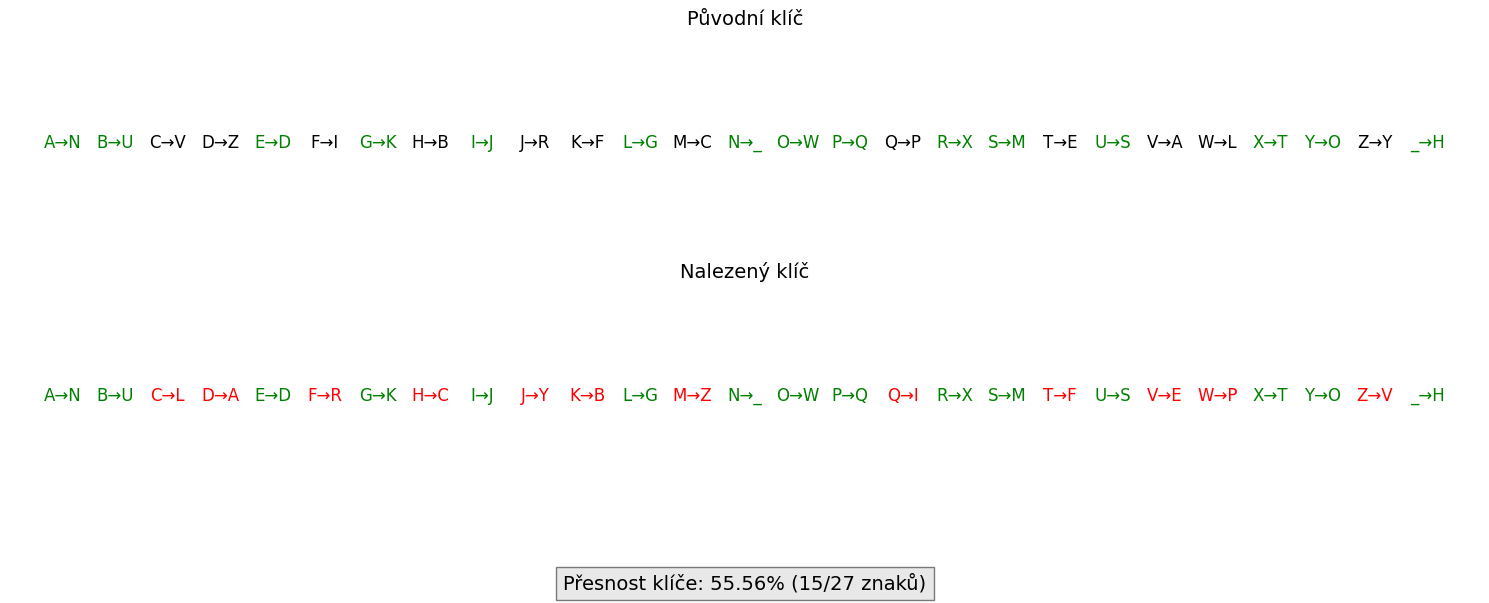

In [103]:
def compare_keys(original_key, found_key):
    """Vizualizuje porovnání původního a nalezeného klíče."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

    # Původní klíč
    ax1.set_title("Původní klíč", fontsize=14)
    for i, (a, k) in enumerate(zip(ALPHABET, original_key)):
        ax1.text(i, 0.5, f"{a}→{k}", ha="center", va="center", fontsize=12,
                color="green" if original_key[i] == found_key[i] else "black")
    ax1.set_xlim(-1, len(ALPHABET))
    ax1.set_ylim(0, 1)
    ax1.axis("off")

    # Nalezený klíč
    ax2.set_title("Nalezený klíč", fontsize=14)
    for i, (a, k) in enumerate(zip(ALPHABET, found_key)):
        ax2.text(i, 0.5, f"{a}→{k}", ha="center", va="center", fontsize=12,
                color="green" if original_key[i] == found_key[i] else "red")
    ax2.set_xlim(-1, len(ALPHABET))
    ax2.set_ylim(0, 1)
    ax2.axis("off")

    # Statistika
    correct_mappings = sum(1 for a, b in zip(original_key, found_key) if a == b)
    accuracy = correct_mappings / len(ALPHABET) * 100
    plt.figtext(0.5, 0.01, f"Přesnost klíče: {accuracy:.2f}% ({correct_mappings}/{len(ALPHABET)} znaků)",
               ha="center", fontsize=14, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.show()

compare_keys(demo_key, best_key)


## 7. Analýza úspěšnosti

Nyní provedeme systematickou analýzu úspěšnosti Metropolis-Hastings algoritmu v závislosti na délce textu a počtu iterací.


In [104]:
import pandas as pd
from tqdm.notebook import tqdm

# Parametry experimentu
text_lengths = [100, 250, 500, 750, 1000]
iterations_list = [1000, 5000, 10000]
num_trials = 3  # Počet opakování pro každou kombinaci parametrů

results = []

# Provedení experimentů
for length in tqdm(text_lengths, desc="Text lengths"):
    for iterations in tqdm(iterations_list, desc="Iterations", leave=False):
        for trial in tqdm(range(num_trials), desc="Trials", leave=False):
            # Příprava textu
            sample_text = normalized_ref[trial*length:(trial+1)*length]
            sample_key = generate_random_key()
            encrypted = substitute_encrypt(sample_text, sample_key)

            # Dešifrování
            found_key, score = metropolis_hastings(encrypted, bigram_matrix, iterations=iterations)
            decrypted = substitute_decrypt(encrypted, found_key)

            # Výpočet úspěšnosti
            text_accuracy = sum(1 for a, b in zip(sample_text, decrypted) if a == b) / len(sample_text) * 100
            key_accuracy = sum(1 for a, b in zip(sample_key, found_key) if a == b) / len(ALPHABET) * 100

            results.append({
                'length': length,
                'iterations': iterations,
                'trial': trial,
                'score': score,
                'text_accuracy': text_accuracy,
                'key_accuracy': key_accuracy
            })

# Převod na DataFrame
results_df = pd.DataFrame(results)


Text lengths:   0%|          | 0/5 [00:00<?, ?it/s]

Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -591.9613 | best score: -591.9613
Iteration 1000 | current score: -584.9068 | best score: -584.9068
Iteration 500 | current score: -574.9110 | best score: -574.9110
Iteration 1000 | current score: -553.0058 | best score: -553.0058
Iteration 500 | current score: -598.2090 | best score: -598.2090
Iteration 1000 | current score: -585.3168 | best score: -585.3168


Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -601.9981 | best score: -600.0227
Iteration 1000 | current score: -537.2782 | best score: -537.2782
Iteration 1500 | current score: -535.7403 | best score: -535.0832
Iteration 2000 | current score: -533.4903 | best score: -532.2858
Iteration 2500 | current score: -532.5694 | best score: -532.2858
Iteration 3000 | current score: -531.4321 | best score: -531.0447
Iteration 3500 | current score: -531.6763 | best score: -531.0447
Iteration 4000 | current score: -531.5241 | best score: -531.0447
Iteration 4500 | current score: -531.2685 | best score: -531.0447
Iteration 5000 | current score: -531.2685 | best score: -531.0447
Iteration 500 | current score: -559.6520 | best score: -559.6520
Iteration 1000 | current score: -554.0107 | best score: -552.4117
Iteration 1500 | current score: -554.0107 | best score: -552.1485
Iteration 2000 | current score: -555.2320 | best score: -552.1485
Iteration 2500 | current score: -552.6556 | best score: -552.1485
Iteration 30

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -602.9145 | best score: -602.9145
Iteration 1000 | current score: -541.4216 | best score: -541.3639
Iteration 1500 | current score: -539.8237 | best score: -537.5823
Iteration 2000 | current score: -537.8346 | best score: -536.5294
Iteration 2500 | current score: -529.1475 | best score: -529.1475
Iteration 3000 | current score: -528.6305 | best score: -528.6305
Iteration 3500 | current score: -534.3895 | best score: -528.6305
Iteration 4000 | current score: -530.2136 | best score: -528.6305
Iteration 4500 | current score: -527.2704 | best score: -527.2704
Iteration 5000 | current score: -527.2704 | best score: -527.2704
Iteration 5500 | current score: -527.5016 | best score: -527.2704
Iteration 6000 | current score: -527.5016 | best score: -527.2704
Iteration 6500 | current score: -530.0427 | best score: -527.2704
Iteration 7000 | current score: -527.2704 | best score: -527.2704
Iteration 7500 | current score: -527.2704 | best score: -527.2704
Iteration 8

Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -1532.5039 | best score: -1532.5039
Iteration 1000 | current score: -1521.7757 | best score: -1521.7757
Iteration 500 | current score: -1587.7007 | best score: -1587.7007
Iteration 1000 | current score: -1572.8465 | best score: -1572.8465
Iteration 500 | current score: -1478.9909 | best score: -1478.9909
Iteration 1000 | current score: -1366.0249 | best score: -1366.0249


Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -1411.0602 | best score: -1410.9957
Iteration 1000 | current score: -1368.6325 | best score: -1368.6325
Iteration 1500 | current score: -1344.0271 | best score: -1344.0271
Iteration 2000 | current score: -1342.8850 | best score: -1340.8355
Iteration 2500 | current score: -1342.1651 | best score: -1340.8355
Iteration 3000 | current score: -1341.8268 | best score: -1340.8355
Iteration 3500 | current score: -1341.8268 | best score: -1340.8355
Iteration 4000 | current score: -1341.5301 | best score: -1340.8355
Iteration 4500 | current score: -1341.5301 | best score: -1340.8355
Iteration 5000 | current score: -1341.5301 | best score: -1340.8355
Iteration 500 | current score: -1572.7760 | best score: -1572.7760
Iteration 1000 | current score: -1417.3732 | best score: -1417.3732
Iteration 1500 | current score: -1411.6051 | best score: -1411.6051
Iteration 2000 | current score: -1393.5387 | best score: -1393.5387
Iteration 2500 | current score: -1393.5387 | best 

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -1495.4341 | best score: -1492.5037
Iteration 1000 | current score: -1491.0197 | best score: -1491.0197
Iteration 1500 | current score: -1490.3436 | best score: -1488.5220
Iteration 2000 | current score: -1365.7004 | best score: -1365.7004
Iteration 2500 | current score: -1358.6264 | best score: -1358.6264
Iteration 3000 | current score: -1358.6264 | best score: -1358.6264
Iteration 3500 | current score: -1359.6956 | best score: -1358.6264
Iteration 4000 | current score: -1358.2507 | best score: -1356.4455
Iteration 4500 | current score: -1359.9109 | best score: -1356.4455
Iteration 5000 | current score: -1356.7582 | best score: -1356.4455
Iteration 5500 | current score: -1351.1954 | best score: -1351.1954
Iteration 6000 | current score: -1351.1954 | best score: -1351.1954
Iteration 6500 | current score: -1350.2440 | best score: -1350.2440
Iteration 7000 | current score: -1350.2440 | best score: -1350.2440
Iteration 7500 | current score: -1350.2440 | best

Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -2894.1639 | best score: -2894.1639
Iteration 1000 | current score: -2804.0870 | best score: -2804.0870
Iteration 500 | current score: -3078.1435 | best score: -3078.1435
Iteration 1000 | current score: -3012.4894 | best score: -3012.4894
Iteration 500 | current score: -2780.0635 | best score: -2780.0635
Iteration 1000 | current score: -2734.7550 | best score: -2734.7550


Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -2973.3718 | best score: -2973.3718
Iteration 1000 | current score: -2823.5119 | best score: -2823.5119
Iteration 1500 | current score: -2811.6272 | best score: -2811.6272
Iteration 2000 | current score: -2787.6759 | best score: -2787.6759
Iteration 2500 | current score: -2787.6759 | best score: -2787.6759
Iteration 3000 | current score: -2785.6935 | best score: -2785.6935
Iteration 3500 | current score: -2785.6935 | best score: -2785.6935
Iteration 4000 | current score: -2785.6935 | best score: -2785.6935
Iteration 4500 | current score: -2785.6935 | best score: -2785.6935
Iteration 5000 | current score: -2785.6935 | best score: -2785.6935
Iteration 500 | current score: -3197.4240 | best score: -3197.4240
Iteration 1000 | current score: -3146.8532 | best score: -3146.8532
Iteration 1500 | current score: -2807.0074 | best score: -2807.0074
Iteration 2000 | current score: -2699.1189 | best score: -2699.1189
Iteration 2500 | current score: -2656.2271 | best 

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -2931.5940 | best score: -2931.5940
Iteration 1000 | current score: -2836.2040 | best score: -2835.6366
Iteration 1500 | current score: -2782.4075 | best score: -2782.4075
Iteration 2000 | current score: -2781.1971 | best score: -2781.1971
Iteration 2500 | current score: -2776.9531 | best score: -2776.9531
Iteration 3000 | current score: -2778.4026 | best score: -2776.9531
Iteration 3500 | current score: -2776.9531 | best score: -2776.9531
Iteration 4000 | current score: -2778.4026 | best score: -2776.9531
Iteration 4500 | current score: -2776.9531 | best score: -2776.9531
Iteration 5000 | current score: -2776.9531 | best score: -2776.9531
Iteration 5500 | current score: -2776.9531 | best score: -2776.9531
Iteration 6000 | current score: -2776.9531 | best score: -2776.9531
Iteration 6500 | current score: -2778.4026 | best score: -2776.9531
Iteration 7000 | current score: -2778.4026 | best score: -2776.9531
Iteration 7500 | current score: -2776.9531 | best

Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -4344.8132 | best score: -4344.8132
Iteration 1000 | current score: -4148.9129 | best score: -4148.9129
Iteration 500 | current score: -4724.9395 | best score: -4724.9395
Iteration 1000 | current score: -4664.0750 | best score: -4664.0750
Iteration 500 | current score: -4330.5439 | best score: -4330.5439
Iteration 1000 | current score: -4131.0791 | best score: -4131.0791


Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -4734.9704 | best score: -4734.9704
Iteration 1000 | current score: -4667.6522 | best score: -4667.6522
Iteration 1500 | current score: -4638.1400 | best score: -4638.0117
Iteration 2000 | current score: -4638.0117 | best score: -4638.0117
Iteration 2500 | current score: -4636.1460 | best score: -4636.1460
Iteration 3000 | current score: -4632.0957 | best score: -4632.0957
Iteration 3500 | current score: -4632.0957 | best score: -4632.0957
Iteration 4000 | current score: -4632.0957 | best score: -4632.0957
Iteration 4500 | current score: -4632.0957 | best score: -4632.0957
Iteration 5000 | current score: -4632.0957 | best score: -4632.0957
Iteration 500 | current score: -4333.6694 | best score: -4333.6694
Iteration 1000 | current score: -4134.4196 | best score: -4134.4196
Iteration 1500 | current score: -4064.3608 | best score: -4064.3608
Iteration 2000 | current score: -3973.0361 | best score: -3973.0361
Iteration 2500 | current score: -3966.8903 | best 

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -4369.6927 | best score: -4369.6927
Iteration 1000 | current score: -4260.5659 | best score: -4260.5659
Iteration 1500 | current score: -4255.2886 | best score: -4255.2886
Iteration 2000 | current score: -4245.5373 | best score: -4245.5373
Iteration 2500 | current score: -4246.6020 | best score: -4245.5373
Iteration 3000 | current score: -4245.5373 | best score: -4245.5373
Iteration 3500 | current score: -4246.6020 | best score: -4245.5373
Iteration 4000 | current score: -4245.5373 | best score: -4245.5373
Iteration 4500 | current score: -4245.5373 | best score: -4245.5373
Iteration 5000 | current score: -4245.5373 | best score: -4245.5373
Iteration 5500 | current score: -4245.5373 | best score: -4245.5373
Iteration 6000 | current score: -4246.6020 | best score: -4245.5373
Iteration 6500 | current score: -4245.5373 | best score: -4245.5373
Iteration 7000 | current score: -4245.5373 | best score: -4245.5373
Iteration 7500 | current score: -4246.6020 | best

Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -6301.7463 | best score: -6301.7463
Iteration 1000 | current score: -5566.4336 | best score: -5566.3620
Iteration 500 | current score: -5786.7524 | best score: -5786.7524
Iteration 1000 | current score: -5391.6443 | best score: -5391.6443
Iteration 500 | current score: -5596.6805 | best score: -5596.5908
Iteration 1000 | current score: -5532.2203 | best score: -5532.2203


Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -6506.7430 | best score: -6506.7430
Iteration 1000 | current score: -5973.1778 | best score: -5971.3234
Iteration 1500 | current score: -5653.9888 | best score: -5653.9888
Iteration 2000 | current score: -5582.9050 | best score: -5582.9050
Iteration 2500 | current score: -5582.9050 | best score: -5582.9050
Iteration 3000 | current score: -5582.9050 | best score: -5582.9050
Iteration 3500 | current score: -5582.9050 | best score: -5582.9050
Iteration 4000 | current score: -5582.9050 | best score: -5582.9050
Iteration 4500 | current score: -5582.9050 | best score: -5582.9050
Iteration 5000 | current score: -5582.9050 | best score: -5582.9050
Iteration 500 | current score: -5675.8793 | best score: -5675.8793
Iteration 1000 | current score: -5500.2086 | best score: -5500.2086
Iteration 1500 | current score: -5425.7457 | best score: -5425.7457
Iteration 2000 | current score: -5171.6820 | best score: -5171.6820
Iteration 2500 | current score: -5140.9312 | best 

Trials:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration 500 | current score: -5899.4656 | best score: -5899.4656
Iteration 1000 | current score: -5647.6539 | best score: -5647.6539
Iteration 1500 | current score: -5523.0185 | best score: -5523.0185
Iteration 2000 | current score: -5445.0050 | best score: -5445.0050
Iteration 2500 | current score: -5437.3060 | best score: -5437.3060
Iteration 3000 | current score: -5437.3060 | best score: -5437.2240
Iteration 3500 | current score: -5419.7786 | best score: -5419.7786
Iteration 4000 | current score: -5419.7786 | best score: -5419.7786
Iteration 4500 | current score: -5419.7786 | best score: -5419.7786
Iteration 5000 | current score: -5419.7786 | best score: -5419.7786
Iteration 5500 | current score: -5419.7786 | best score: -5419.7786
Iteration 6000 | current score: -5419.7786 | best score: -5419.7786
Iteration 6500 | current score: -5419.7786 | best score: -5419.7786
Iteration 7000 | current score: -5419.7786 | best score: -5419.7786
Iteration 7500 | current score: -5419.7786 | best

### Vizualizace výsledků

Nyní vizualizujeme výsledky experimentů:


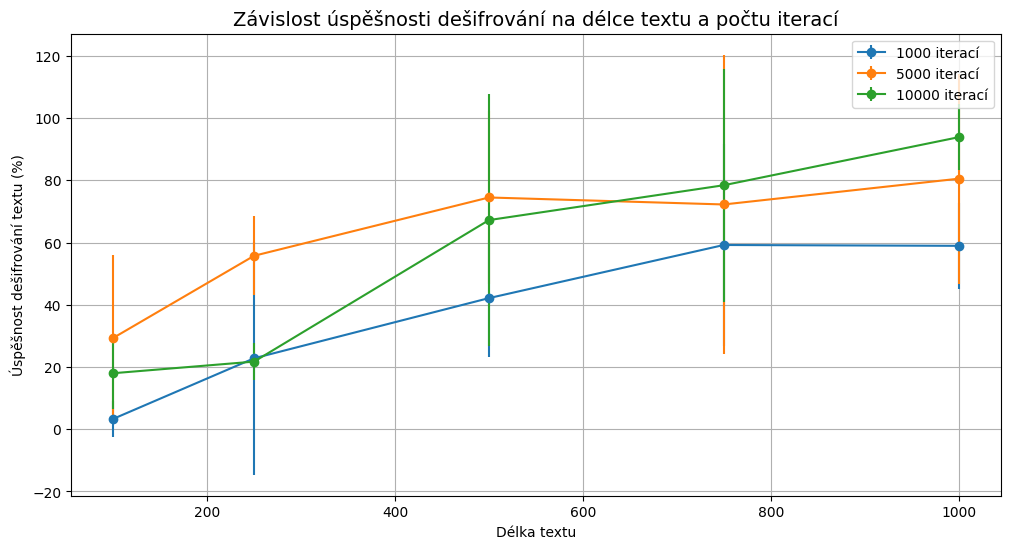

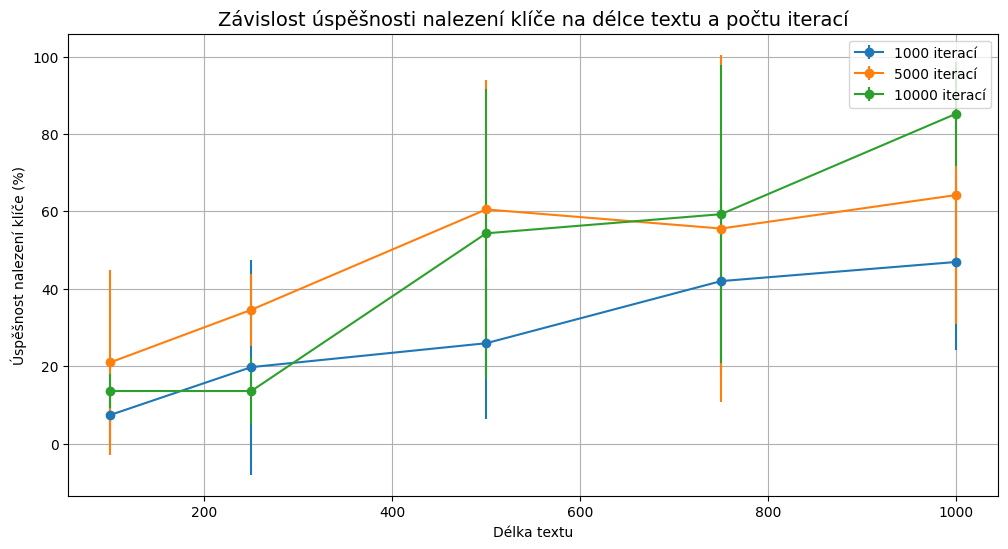

In [105]:
# Agregace výsledků
agg_results = results_df.groupby(['length', 'iterations']).agg({
    'text_accuracy': ['mean', 'std'],
    'key_accuracy': ['mean', 'std'],
    'score': ['mean', 'std']
}).reset_index()

# Vizualizace úspěšnosti dešifrování textu
plt.figure(figsize=(12, 6))
for iterations in iterations_list:
    data = agg_results[agg_results['iterations'] == iterations]
    plt.errorbar(data['length'], data['text_accuracy']['mean'], yerr=data['text_accuracy']['std'],
                marker='o', label=f'{iterations} iterací')

plt.xlabel('Délka textu')
plt.ylabel('Úspěšnost dešifrování textu (%)')
plt.title('Závislost úspěšnosti dešifrování na délce textu a počtu iterací', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Vizualizace úspěšnosti nalezení klíče
plt.figure(figsize=(12, 6))
for iterations in iterations_list:
    data = agg_results[agg_results['iterations'] == iterations]
    plt.errorbar(data['length'], data['key_accuracy']['mean'], yerr=data['key_accuracy']['std'],
                marker='o', label=f'{iterations} iterací')

plt.xlabel('Délka textu')
plt.ylabel('Úspěšnost nalezení klíče (%)')
plt.title('Závislost úspěšnosti nalezení klíče na délce textu a počtu iterací', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### Analýza vlivu počtu iterací

Podívejme se detailněji na vliv počtu iterací na úspěšnost dešifrování:


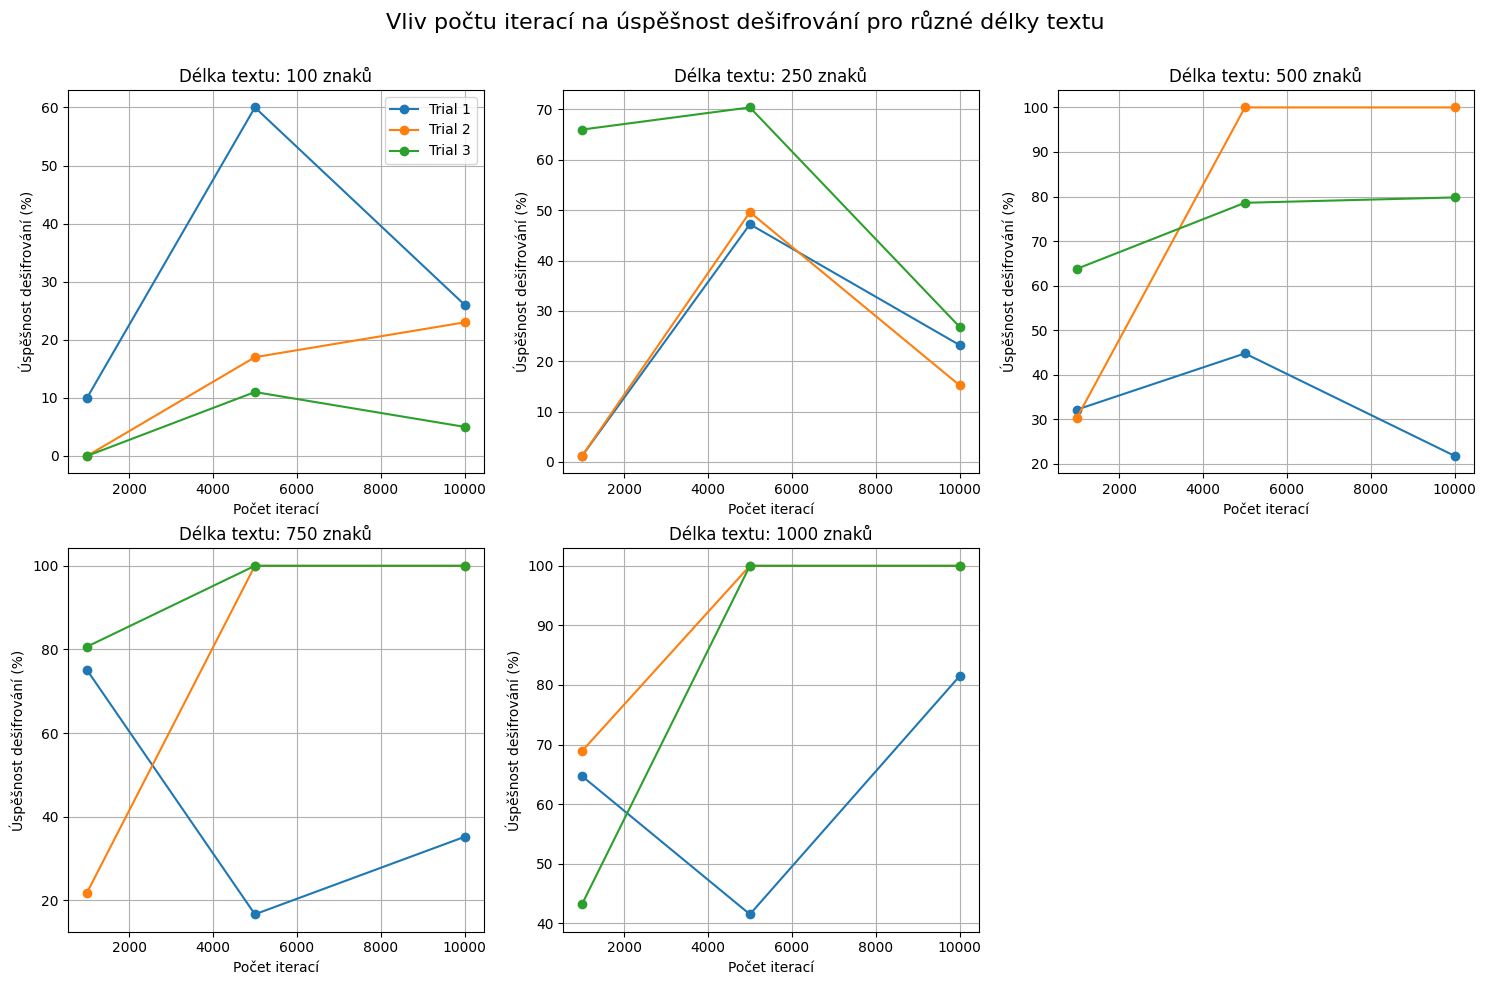

In [106]:
# Vizualizace vlivu počtu iterací pro různé délky textu
plt.figure(figsize=(15, 10))

for i, length in enumerate(text_lengths):
    plt.subplot(2, 3, i+1)
    data = results_df[results_df['length'] == length]

    for trial in range(num_trials):
        trial_data = data[data['trial'] == trial]
        plt.plot(trial_data['iterations'], trial_data['text_accuracy'], marker='o', label=f'Trial {trial+1}')

    plt.title(f'Délka textu: {length} znaků')
    plt.xlabel('Počet iterací')
    plt.ylabel('Úspěšnost dešifrování (%)')
    plt.grid(True)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.suptitle('Vliv počtu iterací na úspěšnost dešifrování pro různé délky textu', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


## Porovnání různých stylů textu

Nyní porovnáme dva různé texty - "Krakatit" od Karla Čapka a "Osudy dobrého vojáka Švejka" od Jaroslava Haška. Tyto texty mají odlišný styl a žánr, což by se mělo projevit v jejich statistických vlastnostech.


In [107]:
# Načtení a normalizace obou textů
krakatit_text = load_textfile("../data_samples/krakatit.txt")
svejk_text = load_textfile("../data_samples/svejk.txt")

krakatit_norm = normalize_text(krakatit_text)
svejk_norm = normalize_text(svejk_text)

print(f"Délka textu Krakatit: {len(krakatit_norm)} znaků")
print(f"Délka textu Švejk: {len(svejk_norm)} znaků")

# Vytvoření bigramových matic pro oba texty
krakatit_bigrams = get_bigrams(krakatit_norm)
svejk_bigrams = get_bigrams(svejk_norm)

krakatit_matrix = transition_matrix(krakatit_bigrams, ALPHABET)
svejk_matrix = transition_matrix(svejk_bigrams, ALPHABET)


Délka textu Krakatit: 439869 znaků
Délka textu Švejk: 1176335 znaků


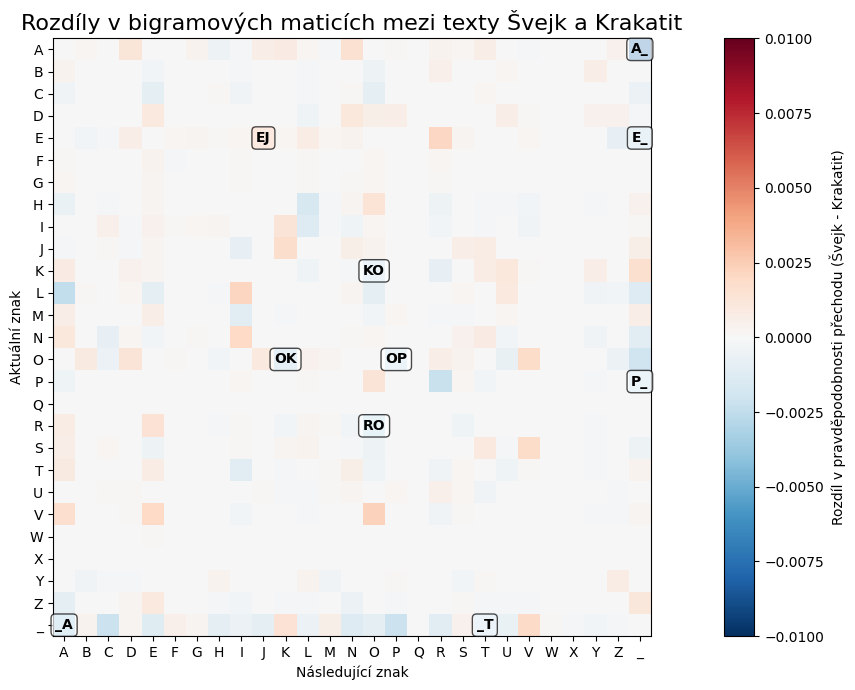

In [108]:
# Vizualizace rozdílů mezi bigramovými maticemi
plt.figure(figsize=(15, 7))

# Rozdílová matice (Švejk - Krakatit)
diff_matrix = svejk_matrix - krakatit_matrix

# Použijeme divergentní barevnou mapu pro zvýraznění rozdílů
plt.imshow(diff_matrix, cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.colorbar(label='Rozdíl v pravděpodobnosti přechodu (Švejk - Krakatit)')
plt.title('Rozdíly v bigramových maticích mezi texty Švejk a Krakatit', fontsize=16)
plt.xlabel('Následující znak')
plt.ylabel('Aktuální znak')
plt.xticks(range(len(ALPHABET)), list(ALPHABET))
plt.yticks(range(len(ALPHABET)), list(ALPHABET))

# Zvýraznění největších rozdílů
top_diffs = []
for i in range(len(ALPHABET)):
    for j in range(len(ALPHABET)):
        top_diffs.append((i, j, abs(diff_matrix[i, j])))

top_diffs.sort(key=lambda x: x[2], reverse=True)
for i, j, diff in top_diffs[:10]:  # Zobrazení 10 největších rozdílů
    plt.annotate(f"{ALPHABET[i]}{ALPHABET[j]}", xy=(j, i), ha="center", va="center",
                 color="black", fontweight="bold", 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7))

plt.tight_layout()
plt.show()


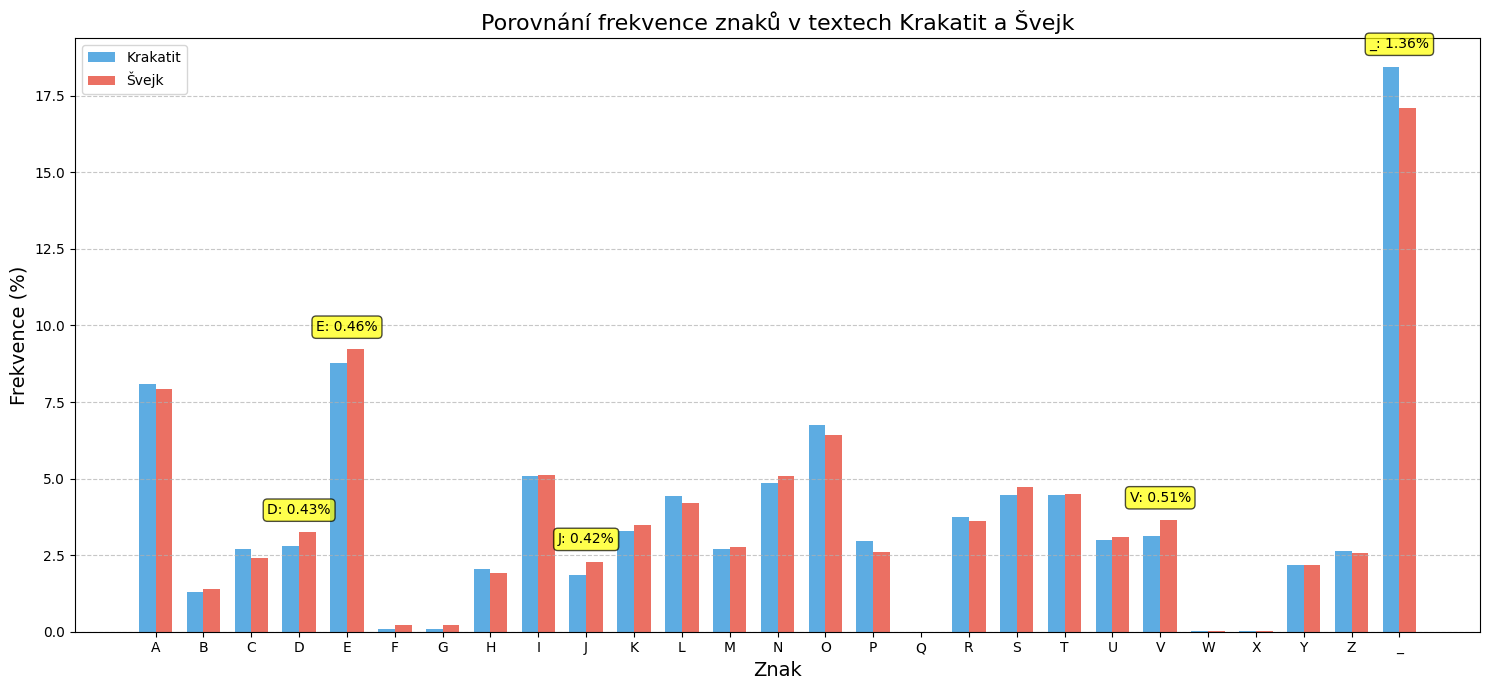

In [109]:
# Porovnání frekvence znaků v obou textech
def get_char_freq(text, alphabet):
    """Vypočítá frekvenci znaků v textu."""
    freq = {char: 0 for char in alphabet}
    total = 0
    for char in text:
        if char in freq:
            freq[char] += 1
            total += 1
    return {char: count/total for char, count in freq.items()}

krakatit_freq = get_char_freq(krakatit_norm, ALPHABET)
svejk_freq = get_char_freq(svejk_norm, ALPHABET)

# Seřazení podle abecedy
chars = list(ALPHABET)
krakatit_values = [krakatit_freq[char] * 100 for char in chars]  # Převod na procenta
svejk_values = [svejk_freq[char] * 100 for char in chars]

# Vytvoření přehledného grafu
plt.figure(figsize=(15, 7))
x = np.arange(len(chars))
width = 0.35

plt.bar(x - width/2, krakatit_values, width, label='Krakatit', color='#3498db', alpha=0.8)
plt.bar(x + width/2, svejk_values, width, label='Švejk', color='#e74c3c', alpha=0.8)

plt.xlabel('Znak', fontsize=14)
plt.ylabel('Frekvence (%)', fontsize=14)
plt.title('Porovnání frekvence znaků v textech Krakatit a Švejk', fontsize=16)
plt.xticks(x, chars)
plt.legend()

# Zvýraznění největších rozdílů
diff_values = [abs(k - s) for k, s in zip(krakatit_values, svejk_values)]
top_diff_indices = sorted(range(len(diff_values)), key=lambda i: diff_values[i], reverse=True)[:5]

for idx in top_diff_indices:
    plt.annotate(f"{chars[idx]}: {abs(krakatit_values[idx] - svejk_values[idx]):.2f}%",
                xy=(idx, max(krakatit_values[idx], svejk_values[idx]) + 0.5),
                ha='center', va='bottom',
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", alpha=0.7))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 8. Limitace a možná vylepšení

Na základě provedených experimentů můžeme identifikovat několik limitací Metropolis-Hastings algoritmu pro prolomení substituční šifry a navrhnout možná vylepšení.


### Limitace

1. **Závislost na délce textu**
   - Pro krátké texty (méně než 500 znaků) je úspěšnost dešifrování výrazně nižší
   - Důvodem je nedostatek statistických informací pro spolehlivé určení správného klíče

2. **Výpočetní náročnost**
   - Pro dosažení vysoké úspěšnosti je potřeba velký počet iterací (10 000+)
   - Časová složitost roste lineárně s počtem iterací

3. **Závislost na kvalitě referenčního modelu**
   - Úspěšnost závisí na podobnosti statistických vlastností referenčního a dešifrovaného textu
   - Pro texty z jiných domén nebo s odlišným stylem může být úspěšnost nižší

4. **Náhodnost algoritmu**
   - Výsledky se mohou lišit mezi jednotlivými běhy algoritmu
   - Pro stejný vstup můžeme dostat různé výsledky

### Možná vylepšení

1. **Pokročilejší statistické modely**
   - Použití trigramů nebo n-gramů vyšších řádů
   - Kombinace různých statistických modelů (bigramy, frekvence znaků, slovníkové metody)

2. **Optimalizace parametrů algoritmu**
   - Adaptivní schéma snižování teploty
   - Dynamické určení počtu iterací podle délky textu

3. **Paralelizace**
   - Spuštění více instancí algoritmu s různými počátečními klíči
   - Výběr nejlepšího výsledku nebo kombinace výsledků

4. **Hybridní přístupy**
   - Kombinace s jinými metodami (genetické algoritmy, neuronové sítě)
   - Použití heuristik pro inicializaci klíče (např. na základě frekvence znaků)


## 9. Závěr

V tomto notebooku jsme provedli hlubokou analýzu knihovny SubCipher a jejího použití Metropolis-Hastings algoritmu pro dešifrování substituční šifry. Hlavní poznatky jsou:

1. **Substituční šifra** je jednoduchá, ale efektivní šifrovací metoda, která nahrazuje každý znak otevřeného textu jiným znakem podle předem definovaného klíče.

2. **Knihovna SubCipher** poskytuje nástroje pro šifrování, dešifrování a kryptoanalýzu substituční šifry. Její hlavní komponenty jsou:
   - Funkce pro šifrování a dešifrování
   - Nástroje pro analýzu textu a vytváření statistických modelů
   - Implementace Metropolis-Hastings algoritmu pro prolomení šifry

3. **Metropolis-Hastings algoritmus** je metoda Markov Chain Monte Carlo, která umožňuje efektivní prohledávání prostoru možných klíčů. Algoritmus funguje na principu:
   - Náhodné procházky prostorem klíčů
   - Hodnocení kvality dešifrovaného textu pomocí bigramové matice
   - Přijetí nebo odmítnutí nového klíče na základě pravděpodobnosti
   - Postupného snižování teploty (simulované žíhání)

4. **Úspěšnost dešifrování** závisí na několika faktorech:
   - Délka textu (delší texty poskytují více statistických informací)
   - Počet iterací algoritmu (více iterací zvyšuje šanci na nalezení správného klíče)
   - Kvalita referenčního modelu (podobnost statistických vlastností)

5. **Limitace a možná vylepšení** zahrnují:
   - Nižší úspěšnost pro krátké texty
   - Výpočetní náročnost pro velký počet iterací
   - Možnosti vylepšení pomocí pokročilejších statistických modelů, optimalizace parametrů a paralelizace

Knihovna SubCipher a Metropolis-Hastings algoritmus představují efektivní nástroj pro kryptoanalýzu substituční šifry, který demonstruje základní principy moderních kryptoanalytických metod.
